<a href="https://colab.research.google.com/github/engr-mrlw/Deep-learning-course-repo/blob/main/08_FunctionalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Disease classification

### Importing Libraries

In [5]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Understanding the dataset

Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

Columns:
    - age: age in years
    - sex: (1 = male; 0 = female)
    - cp: chest pain type
    - trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    - chol: serum cholestoral in mg/dl
    - fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    - restecg: resting electrocardiographic results
    - thalach: maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
    - oldpeak: ST depression induced by exercise relative to rest
    - slope: the slope of the peak exercise ST segment
    - ca: number of major vessels (0-3) colored by flourosopy
    - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [7]:
df = pd.read_csv('sample_data/heart.csv')

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1


In [8]:
import pprint
pprint.pprint(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [9]:
df.shape

(303, 14)

In [10]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [13]:
df['sex'].value_counts()

,count
sex,
1,207
0,96


In [14]:
df['cp'].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


### Data VIsualization

In [15]:
len(df['cp'])

303

#### 1) Sex

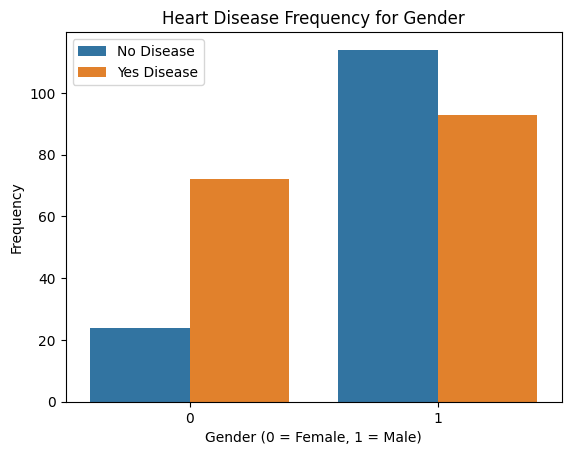

In [16]:
# sns.countplot('sex', hue = 'target', data = df)
sns.countplot(data = df, x='sex', hue = 'target', )
plt.title('Heart Disease Frequency for Gender')
plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()

In [17]:
df['target'].value_counts()

,count
target,
1,165
0,138


#### 2) Age

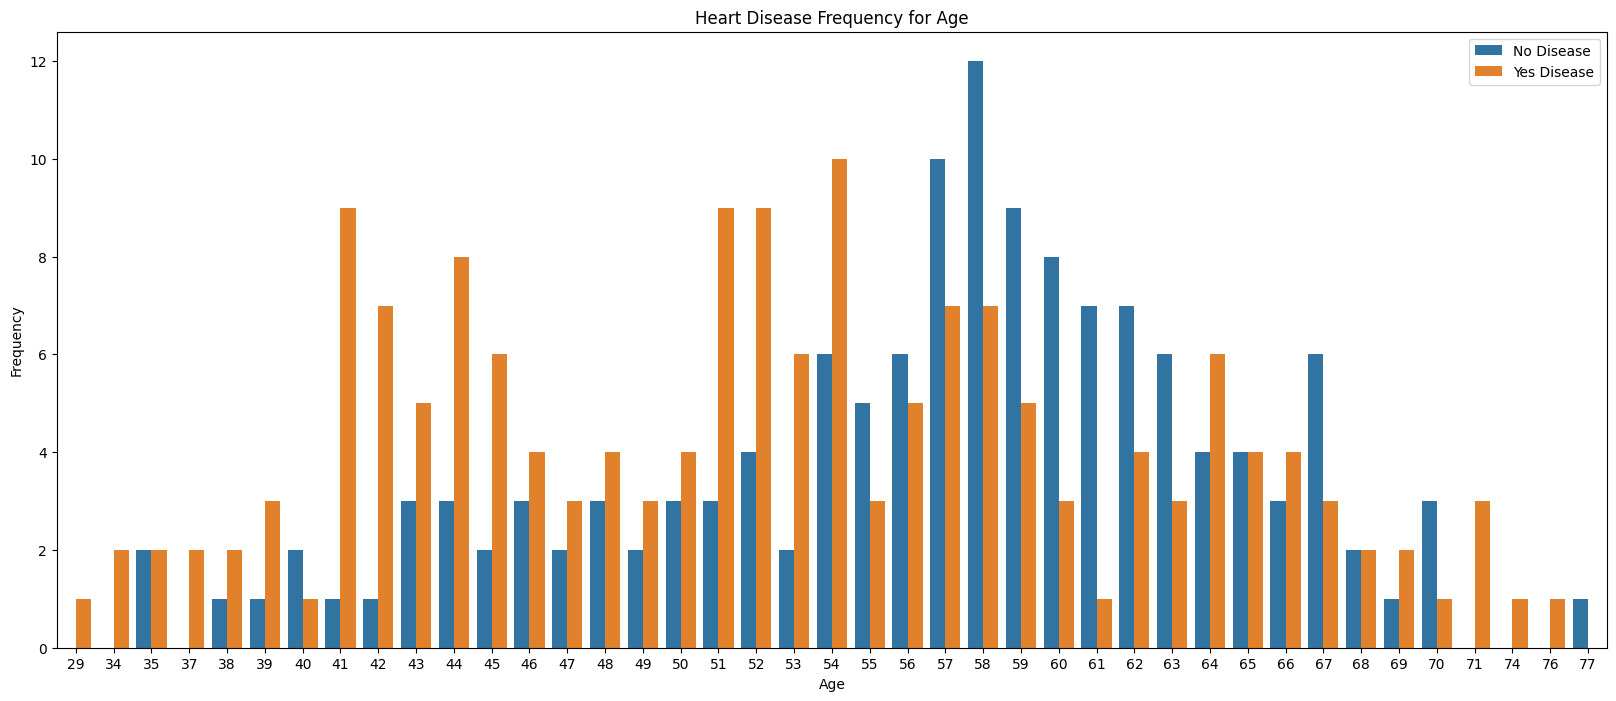

In [18]:
plt.figure(figsize = (20, 8))
# sns.countplot('age', hue = 'target', data = df)
sns.countplot(data = df, x='age', hue = 'target')

plt.title('Heart Disease Frequency for Age')
plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

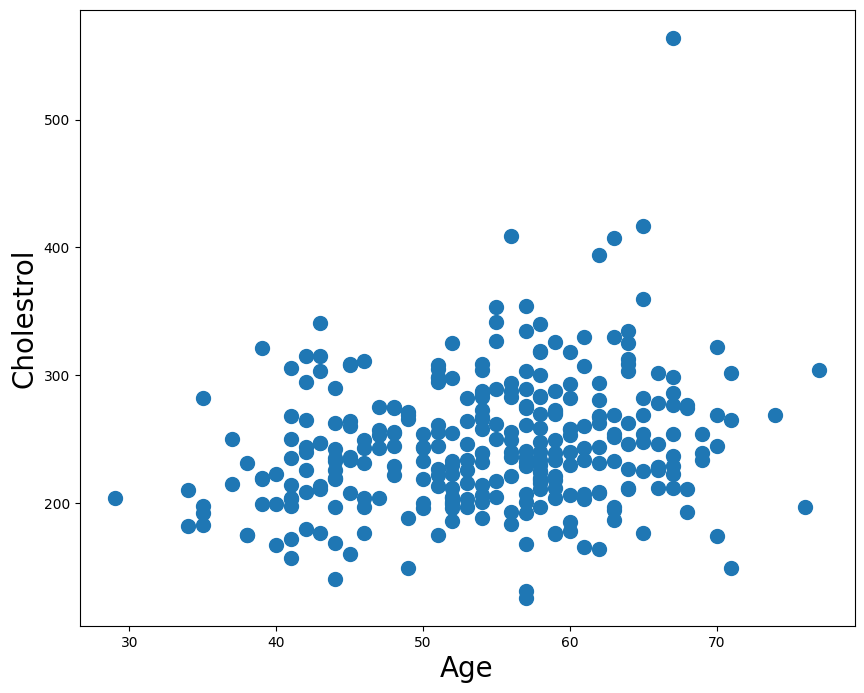

In [40]:
plt.figure(figsize = (10, 8))

plt.scatter(df['age'], df['chol'], s = 100)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol', fontsize = 20)
plt.show()

### Splitting the data

In [20]:
features = df.drop('target', axis=1)

target = df[['target']]

In [21]:
len(target)

303

In [22]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1


In [23]:
target.sample(10)

,target
91,1
158,1
280,0
148,1
4,1
258,0
109,1
95,1
110,1
34,1


In [24]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [25]:
len(categorical_features)

303

In [26]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [27]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [28]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2,2,1


In [29]:
len(processed_features)

303

### Splitting dataset into training and testing data

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state=1)

In [31]:
x_train.shape, y_train.shape

((242, 13), (242, 1))

In [32]:
x_train

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
62,-0.260980,-0.778093,-1.164631,1.764663,-0.896862,1,0,0,3,0,1,1,0
127,1.393352,1.163746,0.593988,0.977514,-0.896862,0,0,0,2,1,2,2,1
111,0.290464,1.049520,-2.324160,1.021244,-0.724323,1,1,0,2,1,2,3,1
287,0.290464,1.277972,-0.275659,0.627670,-0.896862,1,0,0,1,1,2,2,0
108,-0.481558,-0.663867,-0.043753,0.540209,0.052103,0,0,0,1,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.503641,2.762907,0.536011,0.015443,0.483451,1,1,1,2,0,1,3,0
255,-1.033002,0.592617,1.212403,-0.115749,-0.896862,1,0,1,0,3,1,3,0
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,1,0,0,1,0,2,2,0
235,-0.371269,0.478391,1.019148,1.021244,0.483451,1,0,1,0,0,2,3,1


In [33]:
y_train

,target
62,1
127,1
111,1
287,0
108,1
...,...
203,0
255,0
72,1
235,0


In [34]:
x_test.shape, y_test.shape

((61, 13), (61, 1))

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.15,
                                                  random_state=10)

In [37]:
x_train.shape, x_val.shape, x_test.shape

((205, 13), (37, 13), (61, 13))

In [38]:
y_train.shape, y_val.shape, y_test.shape

((205, 1), (37, 1), (61, 1))

### Building the model

In [3]:
def build_model():

    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)

    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    return model

In [41]:
model = build_model()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

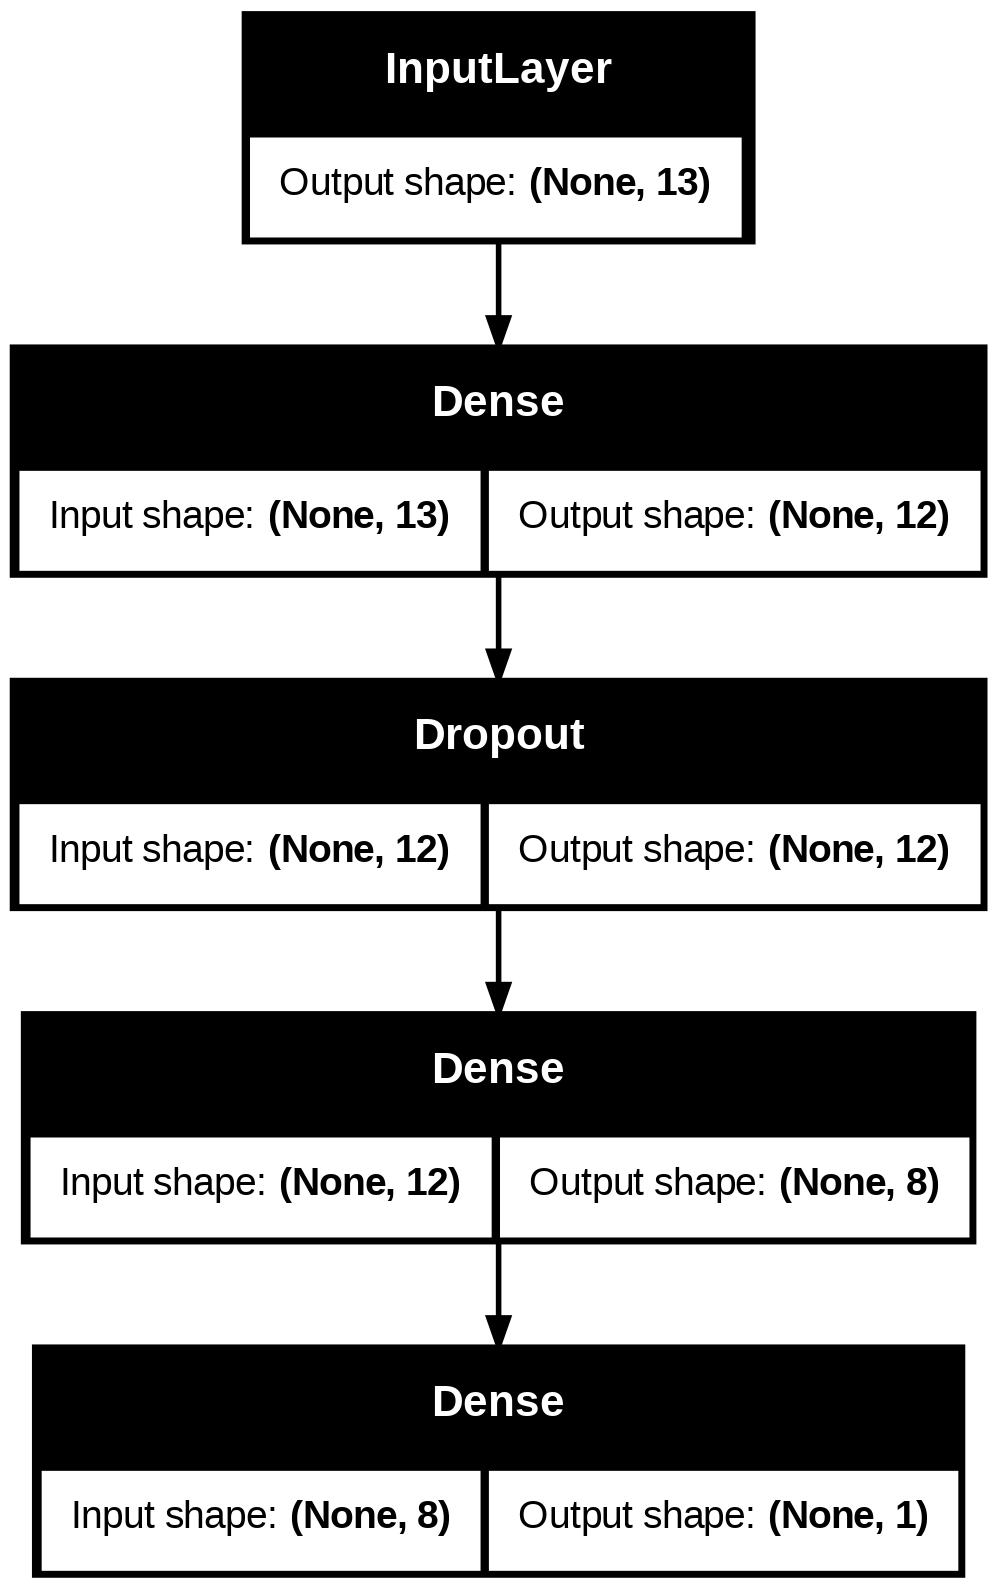

In [42]:
keras.utils.plot_model(model, show_shapes=True)

In [43]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [44]:
dataset_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [45]:
num_epochs = 100

In [47]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [48]:
dataset_val

<_BatchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [49]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4841 - loss: 0.7450 - precision_1: 0.5621 - recall_1: 0.5054 - val_accuracy: 0.5405 - val_loss: 0.7248 - val_precision_1: 0.5882 - val_recall_1: 0.5000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5032 - loss: 0.7278 - precision_1: 0.5869 - recall_1: 0.5239 - val_accuracy: 0.6486 - val_loss: 0.7090 - val_precision_1: 0.6842 - val_recall_1: 0.6500
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5542 - loss: 0.6931 - precision_1: 0.6316 - recall_1: 0.5828 - val_accuracy: 0.6486 - val_loss: 0.6954 - val_precision_1: 0.6842 - val_recall_1: 0.6500
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.6224 - precision_1: 0.7044 - recall_1: 0.7112 - val_accuracy: 0.6757 - val_loss: 0.6845 - val_precision_1: 0.7000 - val_recall_1: 0.7000
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6930 - loss: 0.6108 - precision_1: 0.7379 - recall_1: 0.7361 - val

### Plotting accuracy

In [50]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])

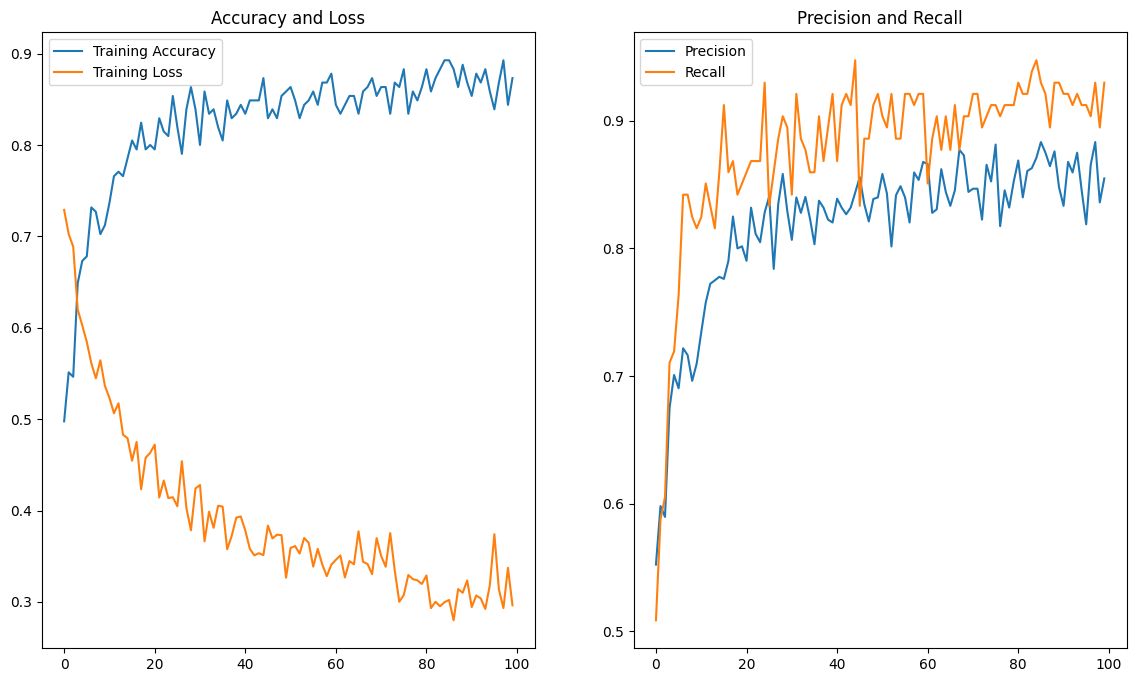

In [51]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

In [52]:
len(x_test), len(y_test)

(61, 61)

In [53]:
x_test

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
204,0.841908,1.620649,-1.589792,-0.203210,4.451851,0,0,0,0,3,0,3,0
159,0.180175,-0.092738,-0.488239,0.583939,-0.896862,1,0,0,1,0,2,3,0
219,-0.702136,-0.092738,0.188152,0.015443,-0.896862,1,1,1,0,2,2,3,0
174,0.621330,-0.092738,-0.778122,-0.771706,1.173608,1,0,1,0,2,1,3,0
184,-0.481558,1.049520,-0.063079,-0.946628,1.346147,1,0,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
288,0.290464,-1.234996,1.714865,-0.290671,1.691225,1,0,1,0,1,1,3,1
259,-1.805024,-0.663867,-0.294985,1.414819,2.381381,1,0,1,3,0,1,3,1
179,0.290464,1.049520,0.574662,-1.646316,-0.379244,1,0,1,0,1,1,1,0


In [54]:
y_test

,target
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


In [59]:
score

[0.553968071937561, 0.7377049326896667, 0.7027027010917664, 0.8387096524238586]

In [56]:
model.compute_metrics

<bound method Trainer.compute_metrics of <Functional name=functional_1, built=True>>

### Model evaluation

In [57]:
score = model.evaluate(x_test, y_test)

# score_df = pd.Series(score, index = model.metrics_names)
# score_df = pd.Series(score, index = model.metrics_names)
# score_df = pd.Series(score)
score_df = pd.Series(score, ['accuracy', 'loss', 'precision', 'recall'])

score_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7626 - loss: 0.4679 - precision_1: 0.7277 - recall_1: 0.8508 


,0
accuracy,0.553968
loss,0.737705
precision,0.702703
recall,0.838710


### Prediction

In [58]:
y_pred = model.predict(x_test)

y_pred[:10]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.00282349],
       [0.85973257],
       [0.02740355],
       [0.00772875],
       [0.03455997],
       [0.00573715],
       [0.01274834],
       [0.3606956 ],
       [0.00663042],
       [0.9694741 ]], dtype=float32)

In [60]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [61]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [62]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [63]:
pred_results.sample(10)

,y_test,y_pred
54,1,1
42,1,0
59,0,0
27,1,1
47,1,1
46,0,0
52,0,1
28,1,1
38,0,1
1,1,1


In [64]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,19,5
1,11,26


In [65]:
accuracy_score(y_test, y_pred)

0.7377049180327869

In [66]:
precision_score(y_test, y_pred)

0.7027027027027027

In [67]:
recall_score(y_test, y_pred)

0.8387096774193549